In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

%matplotlib inline

In [2]:
files = r'C:\Users\apurv\Downloads\CAMS Reanalysis DATA\adaptor.mars.internal-1675242035.1026187-15483-8-7e8a39d0-4852-4f5c-85d5-5ef3a2685ff6.nc'

ds_cams = xr.open_mfdataset(files)
ds_cams

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 234)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2022-06-01
Data variables:
    bcaod550   (time, latitude, longitude) float32 dask.array<chunksize=(234, 241, 480), meta=np.ndarray>
    duaod550   (time, latitude, longitude) float32 dask.array<chunksize=(234, 241, 480), meta=np.ndarray>
    pm10       (time, latitude, longitude) float32 dask.array<chunksize=(234, 241, 480), meta=np.ndarray>
    pm2p5      (time, latitude, longitude) float32 dask.array<chunksize=(234, 241, 480), meta=np.ndarray>
    asn        (time, latitude, longitude) float32 dask.array<chunksize=(234, 241, 480), meta=np.ndarray>
    sd         (time, latitude, longitude) float32 dask.array<chunksize=(234, 241, 480), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-01 09:00:39 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
dust_cams = ds_cams.duaod550

In [4]:
# Creating a filter

lat = ds_cams.latitude.values
lon = ds_cams.longitude.values
xlon, xlat = np.meshgrid(lon, lat)
fltr = np.ones(xlon.shape)

fltr[xlon<70] = np.NaN
fltr[xlon>90] = np.NaN
fltr[xlat<25] = np.NaN
fltr[xlat>35] = np.NaN

i1 = np.argmin(np.abs(lon-74))
i2 = np.argmin(np.abs(lon-90))+1

j1 = np.argmin(np.abs(lat-35))
j2 = np.argmin(np.abs(lat-26))+1
theta = (26-35)/(90-74)
c = 35-theta*74
X_new = lon[i1:i2]
Y_new = theta*X_new+c
for i in range(len(X_new)):
    idx1 = np.argmin(np.abs(lon-X_new[i]))+1
    idx2 = np.argmin(np.abs(lat-Y_new[i]))
    fltr[idx2, idx1:]= np.NaN
#np.savez('filter_merra_Himalay.npz', filter=fltr)

In [5]:
i3 = np.argmin(np.abs(lon-70))
i4 = np.argmin(np.abs(lon-89))+1

j3 = np.argmin(np.abs(lat-33/5))
j4 = np.argmin(np.abs(lat-24.5))

theta2 = (33.5-24.5)/(70-89)
c2 = 33.5-theta2*70

X_new2 = lon[i3:i4]
Y_new2 = theta2*X_new2 + c2

for i in range(len(X_new2)):
    idx3 = np.argmin(np.abs(lon-X_new2[i]))+1
    idx4 = np.argmin(np.abs(lat-Y_new2[i]))
    fltr[idx4, :idx3] = np.NaN
    


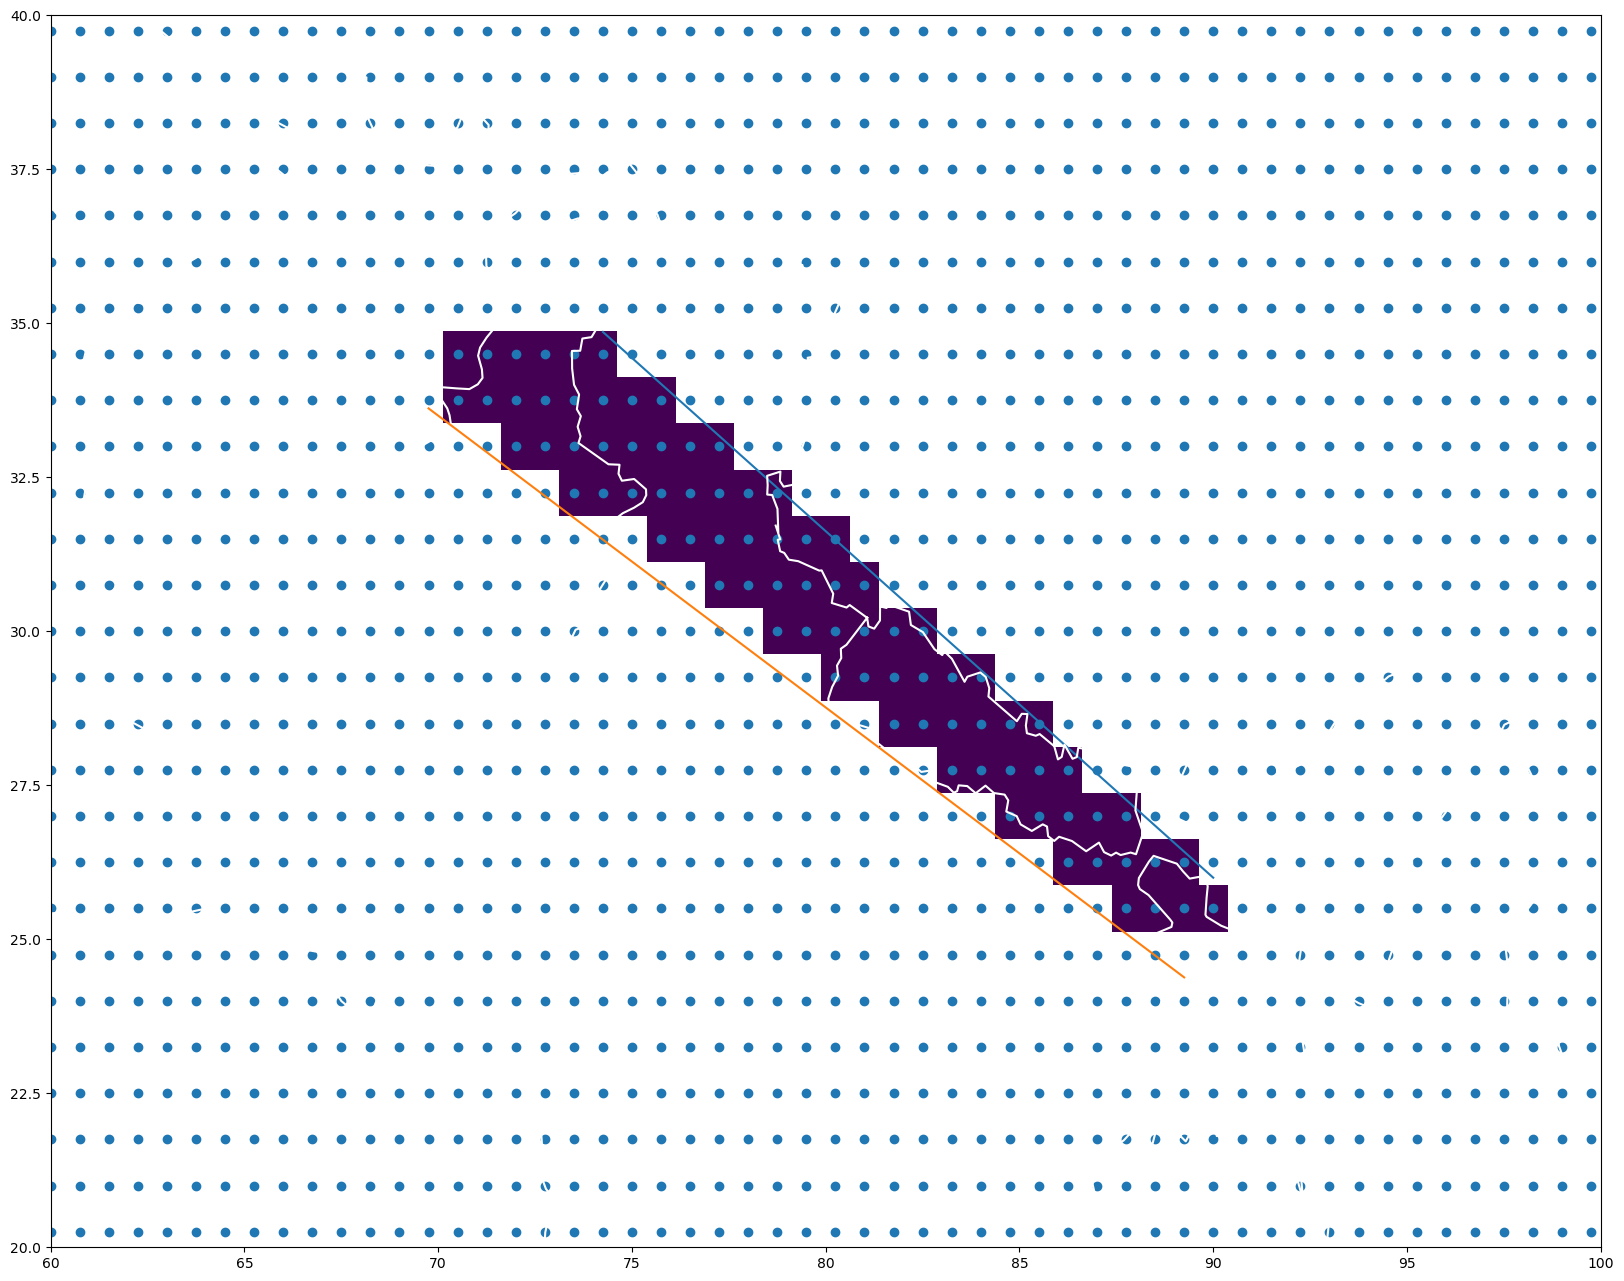

In [6]:
f_in =  r"C:\Users\apurv\Desktop\Spyder\Long_Lat_World.csv"
plt.figure(figsize=(20, 16))
# plt.pcolormesh(lon, lat, ds.DUCMASS[0], cmap=plt.cm.RdPu, alpha=0.6)
plt.pcolormesh(lon, lat, fltr)
plt.plot(X_new, Y_new)
plt.scatter(xlon, xlat)
from numpy import genfromtxt    
my_data = genfromtxt(f_in, delimiter=',')
plt.plot(my_data[:, 0], my_data[:, 1], 'white', lw=1.5)    
plt.xlim(60, 100)
plt.ylim(20, 40)
plt.plot(X_new2, Y_new2)

In [7]:
dust_cams = dust_cams*fltr
dust_cams

<xarray.DataArray 'duaod550' (time: 234, latitude: 241, longitude: 480)>
dask.array<mul, shape=(234, 241, 480), dtype=float64, chunksize=(234, 241, 480), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2022-06-01

In [8]:
month = np.arange(3,6)
years = np.arange(2003,2023)
date = []

for i in range (0,years.size):
    for j in range (0,month.size):
        date.append(str(years[i]) + '-0' + str(month[j]) + '-01')
        
df = pd.DataFrame(0, columns = ['Dust_Cams'], index = date)
df

,Dust_Cams
2003-03-01,0
2003-04-01,0
2003-05-01,0
2004-03-01,0
2004-04-01,0
2004-05-01,0
2005-03-01,0
2005-04-01,0
2005-05-01,0
2006-03-01,0


In [9]:
# Adding the values to the empty dataframe

date2 = np.array(date)
for i in range(0,date2.size):
    value = float(dust_cams.sel(time=date2[i]).mean(dim=('latitude','longitude')))
    df.iloc[i,0] = value
df

,Dust_Cams
2003-03-01,0.043067
2003-04-01,0.064334
2003-05-01,0.095602
2004-03-01,0.033005
2004-04-01,0.092418
2004-05-01,0.120109
2005-03-01,0.023973
2005-04-01,0.064927
2005-05-01,0.076141
2006-03-01,0.025931


In [10]:
df_cams = pd.DataFrame(0, columns=['March', 'April', 'May', 'Year Mean'], index=years)

for i in range(0,years.size):
    df_cams.iloc[i,0] = df.loc[str(years[i]) + '-03-01', 'Dust_Cams']
    df_cams.iloc[i,1] = df.loc[str(years[i]) + '-04-01', 'Dust_Cams']
    df_cams.iloc[i,2] = df.loc[str(years[i]) + '-05-01', 'Dust_Cams']
    df_cams.iloc[i,3] = df_cams.iloc[i,[0,1,2]].mean()
    
df_cams

,March,April,May,Year Mean
2003,0.043067,0.064334,0.095602,0.067667
2004,0.033005,0.092418,0.120109,0.081844
2005,0.023973,0.064927,0.076141,0.055014
2006,0.025931,0.050244,0.084613,0.053596
2007,0.032981,0.064306,0.088722,0.062003
2008,0.040351,0.064644,0.138298,0.081098
2009,0.039930,0.059940,0.071613,0.057161
2010,0.035067,0.075578,0.098596,0.069747
2011,0.028281,0.056221,0.092810,0.059104
2012,0.075284,0.044209,0.083346,0.067613


In [16]:
df_merra = pd.read_csv('Snow Depth Merra.csv', index_col=0)
df_merra

,Snowdp mean,Ducmass mean
1991,0.092130,0.000183
1992,0.148728,0.000136
1993,0.140342,0.000134
1994,0.122794,0.000143
1995,0.178862,0.000135
1996,0.174369,0.000140
1997,0.133858,0.000138
1998,0.137594,0.000136
1999,0.100818,0.000138
2000,0.098357,0.000255


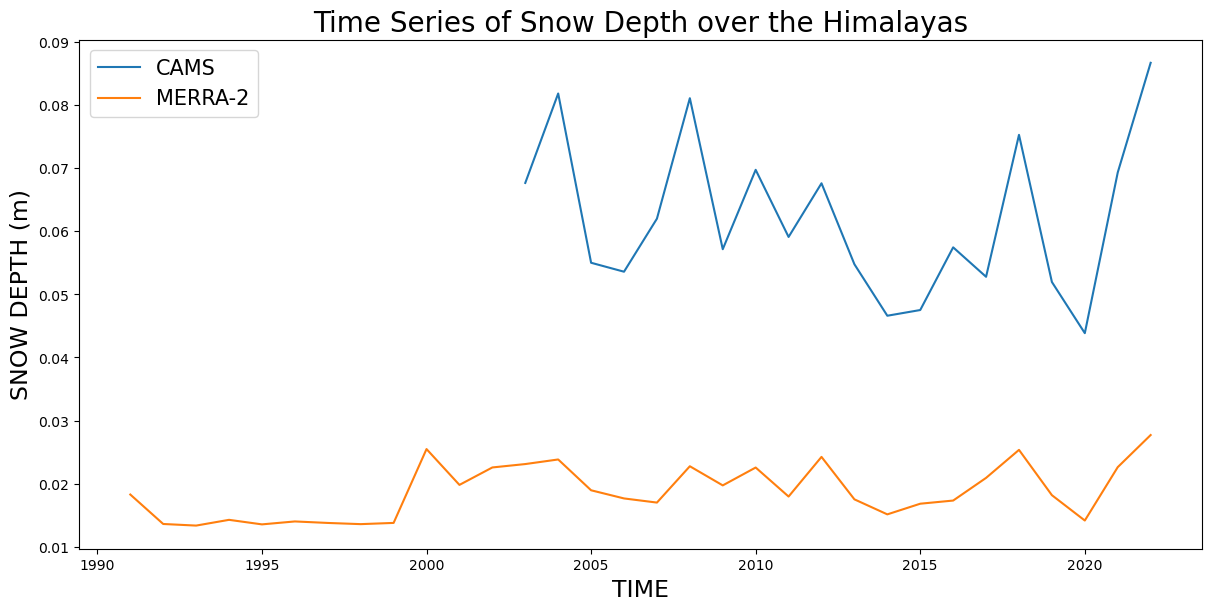

In [24]:
# TIME SERIES OF SNOW DEPTH

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

# line1 = ax.plot(df_cams['March'], label='March')
# line2 = ax.plot(df_cams['April'], label='April')
# line3 = ax.plot(df_cams['May'], label='May')

line1 = ax.plot(df_cams['Year Mean'], label='CAMS', linestyle='solid')
line2 = ax.plot(df_merra['Ducmass mean']*100, label='MERRA-2', linestyle='solid')

#line5 = plt.axhline(y=0, color='black', linestyle='--', label='Climatological Mean')

ax.set_xlabel('TIME').set_size(17)
ax.set_ylabel('SNOW DEPTH (m)').set_size(17)

ax.set_title('Time Series of Snow Depth over the Himalayas', fontsize=20)

plt.legend(fontsize=15)

#fig.savefig('Time Series of Dust Anomalies over the Himalayas.png', dpi=200)

In [26]:
sndp_cams = ds_cams.sd
sndp_cams

<xarray.DataArray 'sd' (time: 234, latitude: 241, longitude: 480)>
dask.array<open_dataset-c9eb2c6d8c7b28a6b6fe6f54cade153asd, shape=(234, 241, 480), dtype=float32, chunksize=(234, 241, 480), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2022-06-01
Attributes:
    units:          m of water equivalent
    long_name:      Snow depth
    standard_name:  lwe_thickness_of_surface_snow_amount

In [31]:
sndp_cams = sndp_cams*fltr

In [32]:
month = np.arange(3,6)
years = np.arange(2003,2023)
date = []

for i in range (0,years.size):
    for j in range (0,month.size):
        date.append(str(years[i]) + '-0' + str(month[j]) + '-01')
        
df_sd = pd.DataFrame(0, columns = ['Cams Snow Depth'], index = date)


date2 = np.array(date)
for i in range(0,date2.size):
    value = float(sndp_cams.sel(time=date2[i]).mean(dim=('latitude','longitude')))
    df_sd.iloc[i,0] = value

df_sd.to_csv('Cams Snow Depth')
df_sd

,Cams Snow Depth
2003-03-01,0.077857
2003-04-01,0.075168
2003-05-01,0.064070
2004-03-01,0.060575
2004-04-01,0.043288
2004-05-01,0.036911
2005-03-01,0.086341
2005-04-01,0.088646
2005-05-01,0.067326
2006-03-01,0.072753


1.1533010005950928